In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import random

import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.set()

In [2]:
class SocialDynamics:
    """
    A simulation of social dynamics in a network - strengthening opinions and weights based on
    random interactions between nodes.
    
    """

    def __init__(self, network_size=50, alpha=0.05, beta=0.3, gamma=4):

        '''
        
        '''

        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):

        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5

        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)
        self.step = 0


    def observe(self):

        self.layout = nx.spring_layout(self.graph, pos=self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color= [self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color = [self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap = plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha = 0.7, vmin=0, vmax=1
        )
        plt.title("Step: " + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:

            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)

        else:

            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]

            for i in range(0, 1):
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1 - i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight + self.beta * weight * (1-weight) * (1-self.gamma * abs(opinions[0] - opinions[1])))

            if self.graph.edges[edge]['weight'] < 0.5:
                self.graph.remove_edge(*edge)

        self.step += 1


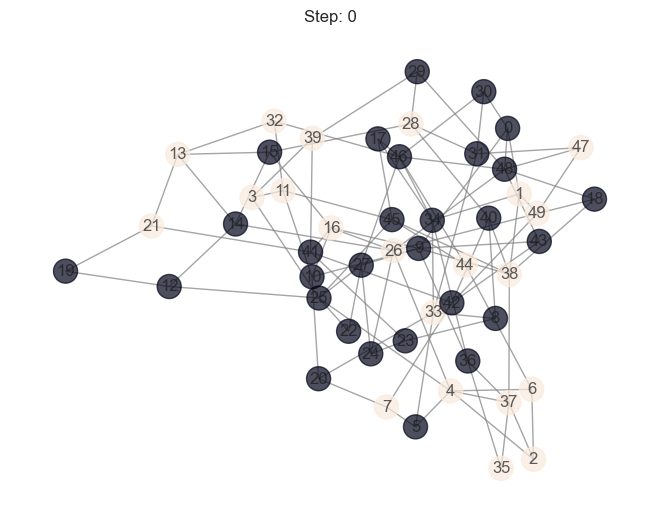

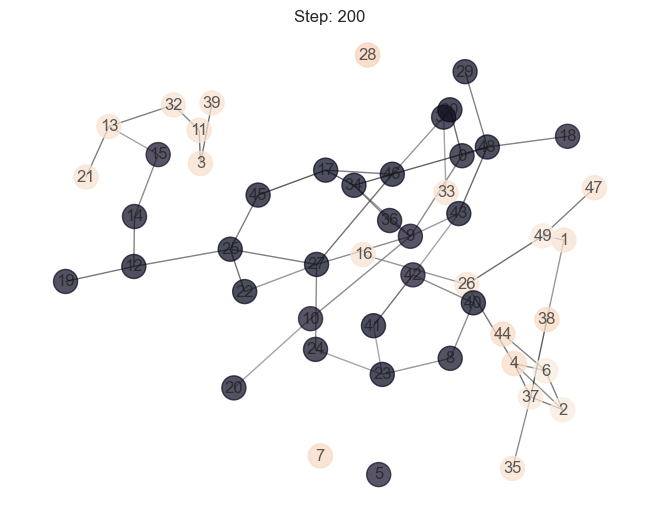

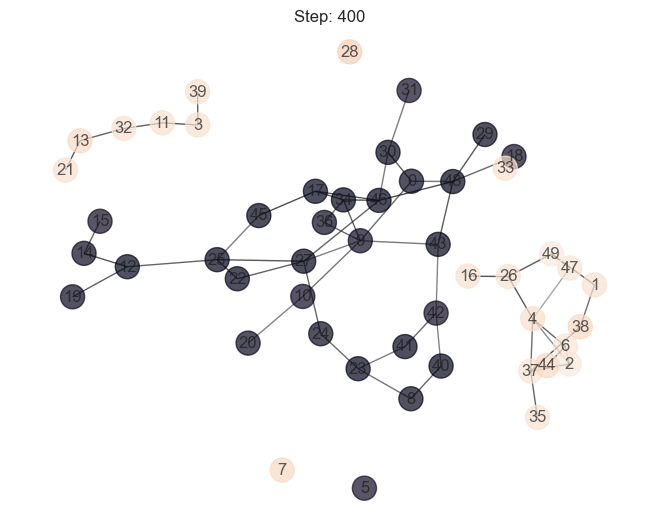

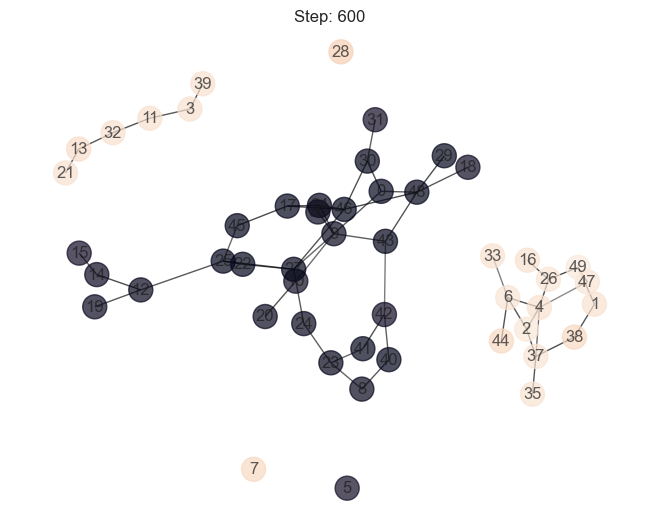

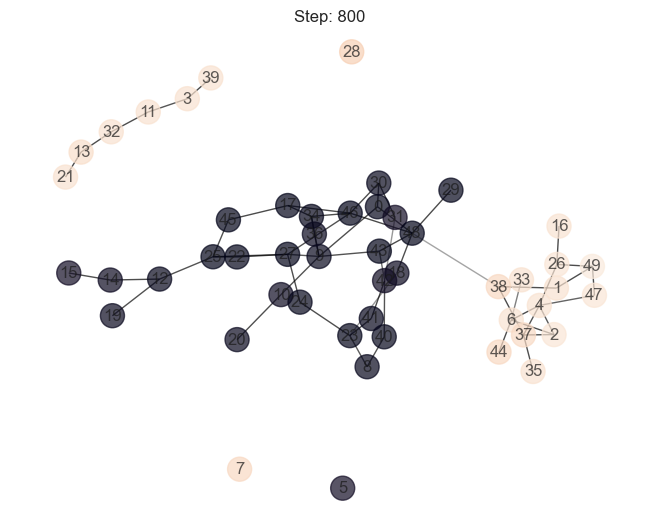

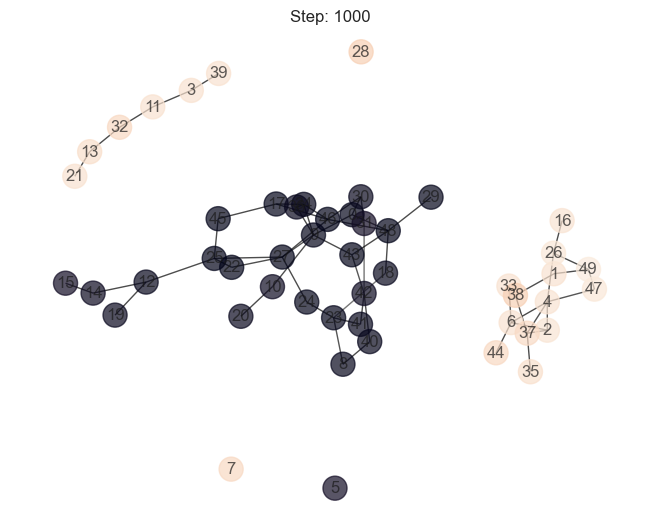

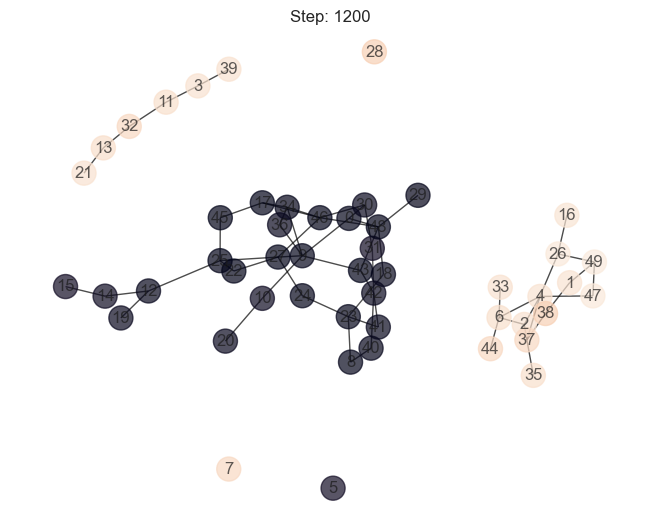

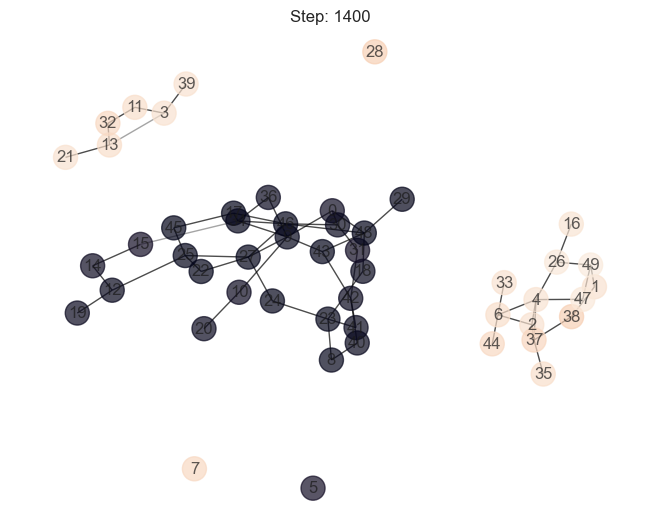

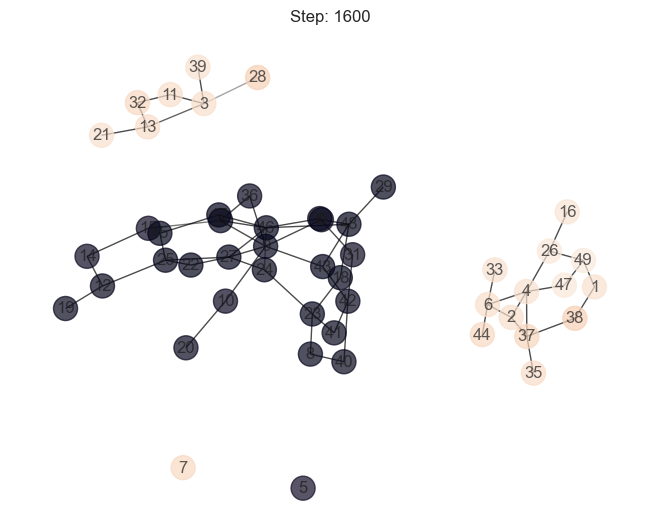

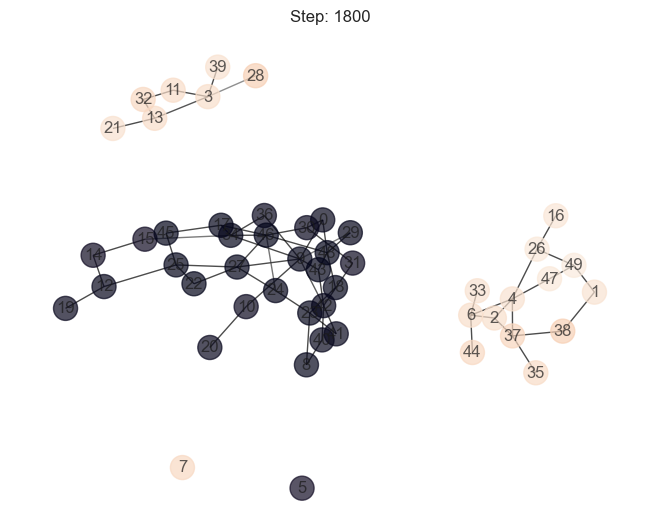

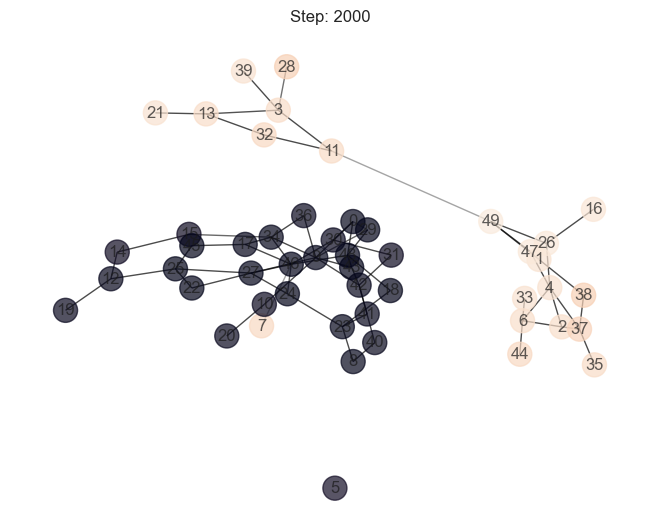

In [3]:
sim = SocialDynamics()
sim.initialize()
plt.figure()
sim.observe()

for i in range(10):
    for i in range(200):
        sim.update()
    plt.figure()
    sim.observe()